In [1]:
pip install sklearn

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip  install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [7]:
df = pd.read_json('./DataSet/Dataset for Detection of Cyber-Trolls.json', lines= True,orient='columns')
df.head

<bound method NDFrame.head of                                                  content  \
0                                 Get fucking real dude.   
1       She is as dirty as they come  and that crook ...   
2       why did you fuck it up. I could do it all day...   
3       Dude they dont finish enclosing the fucking s...   
4       WTF are you talking about Men? No men thats n...   
...                                                  ...   
19996    I dont. But what is complaining about it goi...   
19997   Bahah  yeah i&;m totally just gonna&; get pis...   
19998       hahahahaha >:) im evil mwahahahahahahahahaha   
19999            What&;s something unique about Ohio? :)   
20000              Who is the biggest gossiper you know?   

                          annotation  extras  
0      {'notes': '', 'label': ['1']}     NaN  
1      {'notes': '', 'label': ['1']}     NaN  
2      {'notes': '', 'label': ['1']}     NaN  
3      {'notes': '', 'label': ['1']}     NaN  
4      {'notes

In [8]:
for i in range(0,len(df)):
    if df.annotation[i]['label'][0] == '1':
        df.annotation[i] = 1
    else:
        df.annotation[i] = 0

C:\Users\SHAILE~1.VER\AppData\Local\Temp/ipykernel_12716/1367284056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 1
C:\Users\SHAILE~1.VER\AppData\Local\Temp/ipykernel_12716/1367284056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.annotation[i] = 0


In [9]:
df.drop(['extras'],axis = 1,inplace = True)
df

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [10]:
df.shape 

(20001, 2)

<AxesSubplot:>

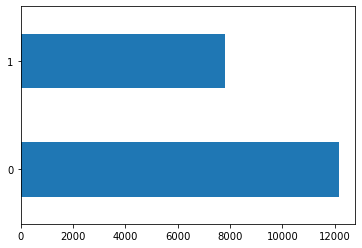

In [11]:
df['annotation'].value_counts().sort_index().plot.barh()

In [12]:
print("PosiNon cyber trollingtive: ", df.annotation.value_counts()[0]/len(df.annotation)*100,"%")
print("Cybertrolling: ", df.annotation.value_counts()[1]/len(df.annotation)*100,"%")

PosiNon cyber trollingtive:  60.89195540222989 %
Cybertrolling:  39.10804459777012 %


In [13]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['content']
df

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,annotation,content_without_puncs
0,1,Get fucking real dude
1,1,She dirty come crook Rengel Dems fucking corru...
2,1,fuck up I could day too Lets hour Ping later s...
3,1,Dude dont finish enclosing fucking showers I h...
4,1,WTF talking Men No men thats menage thats gay
...,...,...
19996,0,I dont But complaining going do
19997,0,Bahah yeah im totally gonna get pissed talking...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,Whats something unique Ohio


In [14]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,annotation,content_tokenize
0,1,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay
...,...,...
19996,0,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio


In [15]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['content'] = noNums
df

,annotation,content_tokenize,content
0,1,get fuck real dude,get fuck real dude
1,1,she dirti come crook rengel dem fuck corrupt ...,she dirti come crook rengel dem fuck corrupt ...
2,1,fuck up i could day too let hour ping later s...,fuck up i could day too let hour ping later s...
3,1,dude dont finish enclos fuck shower i hate ha...,dude dont finish enclos fuck shower i hate ha...
4,1,wtf talk men no men that menag that gay,wtf talk men no men that menag that gay
...,...,...,...
19996,0,i dont but complain go do,i dont but complain go do
19997,0,bahah yeah im total gon na get piss talk you ...,bahah yeah im total gon na get piss talk you ...
19998,0,hahahahaha im evil mwahahahahahahahahaha,hahahahaha im evil mwahahahahahahahahaha
19999,0,what someth uniqu ohio,what someth uniqu ohio


In [16]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.content.tolist())

In [17]:
print(tfIdf.shape)

(20001, 14783)


In [18]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

         TF-IDF
sched  0.413066
ping   0.382982
later  0.306131
write  0.287619
book   0.285848
hour   0.281449
here   0.262648
let    0.241995
up     0.237401
could  0.223151


C:\Users\Shailesh Kr. Verma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names())

C:\Users\Shailesh Kr. Verma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [22]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 533.8157298036014
fuck                                               Score: 503.76150769255435
damn                                               Score: 482.3875012051478
suck                                               Score: 407.37790877127185
ass                                                Score: 337.54089621427744
that                                               Score: 311.6250930420745
lol                                                Score: 298.0085779872157
im                                                 Score: 296.0216055277791
like                                               Score: 287.8183474868775
you                                                Score: 284.7850587424088
it                                                 Score: 254.75722294501585
get                                                Score: 253.19747902607998
what                                               Score: 221.43673623523864
know  

C:\Users\Shailesh Kr. Verma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
X=tfIdf.toarray()
y = np.array(df.annotation.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18000, 14783)
(18000,)
(2001, 14783)
(2001,)


In [25]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [10964  7036]]


In [32]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [1215  786]]


In [33]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

MemoryError: Unable to allocate 1.98 GiB for an array with shape (18000, 14783) and data type float64

In [ ]:
print(X_over.shape)
print(y_over.shape)

In [53]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [8149 8149]]


In [54]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')
  
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

Accuracy:  0.7716666666666666
Confusion Matrix: 
 [[1558  471]
 [ 351 1220]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2029
           1       0.72      0.78      0.75      1571

    accuracy                           0.77      3600
   macro avg       0.77      0.77      0.77      3600
weighted avg       0.77      0.77      0.77      3600



C:\Users\Shailesh Kr. Verma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


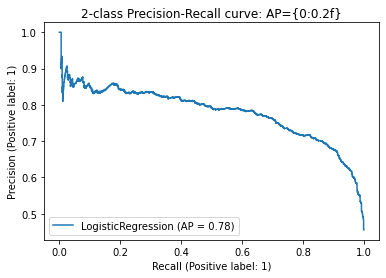

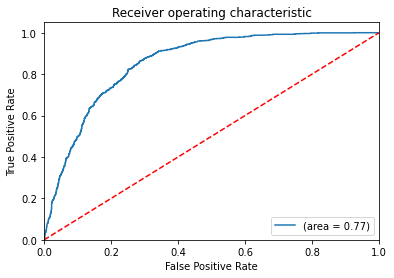

In [55]:
lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(lgr)

Accuracy:  0.7130717320669833
Confusion Matrix: 
 [[1617  812]
 [ 336 1236]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      2429
           1       0.60      0.79      0.68      1572

    accuracy                           0.71      4001
   macro avg       0.72      0.73      0.71      4001
weighted avg       0.74      0.71      0.72      4001



C:\Users\Shailesh Kr. Verma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


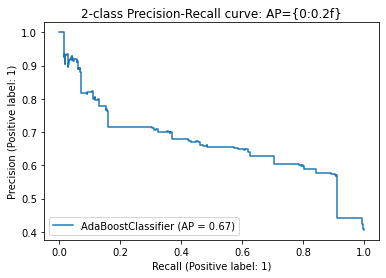

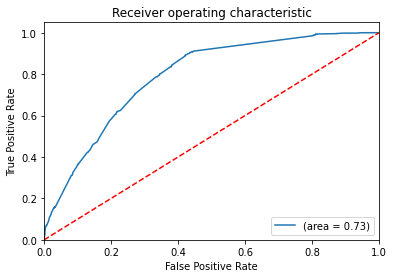

In [34]:
#Ensemble methods from here 
abc = AdaBoostClassifier() 
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(abc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
C:\Users\Shailesh Kr. Verma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Score: 0.9157710572356911
Confusion Matrix: 
 [[2171  258]
 [  79 1493]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2429
           1       0.85      0.95      0.90      1572

    accuracy                           0.92      4001
   macro avg       0.91      0.92      0.91      4001
weighted avg       0.92      0.92      0.92      4001



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


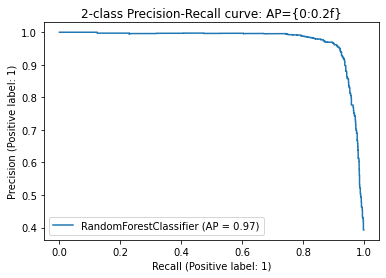

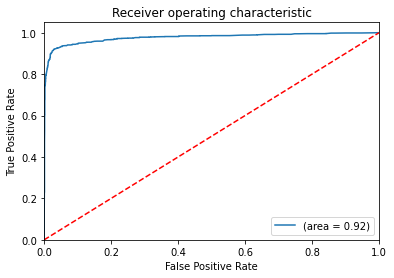

In [35]:
rfc = RandomForestClassifier(verbose=True) #uses randomized decision trees
rfcmodel = rfc.fit(X_over, y_over)
y_pred = rfc.predict(X_test)
print ("Score:", rfcmodel.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(rfc)